## FYP

## Topic: 北京PM2.5浓度回归分析
#### 预测接下来一段时间内北京的PM2.5指数

### Q1: catagorical data (cbwd) (Yes/No)?
### Q2: Fit better?

## Table of Content:
* <a href='#1. Read the data'>1. Read the data</a>
* <a href='#2. Convert data'>2. Convert data</a>
* <a href='#3. Visualize the data (2D/3D)'>3. Visualize the data (2D/3D)</a>
* <a href='#4. Split into train & test set'>4. Split into train & test set</a>
* <a href='#5. Implement algorithms'>5. Implement algorithms</a>
    * <a href='#5.1. Linear Regression'>5.1. Linear Regression</a>
    * <a href='#5.2. Neural Network Regression'>5.2. Neural Network Regression</a>
    * <a href='#5.3. Lasso'>5.3. Lasso</a>
    * <a href='#5.4. ElasticNet'>5.4. ElasticNet</a>
    * <a href='#5.5. Decision Forest Regression'>5.5. Decision Forest Regression</a>
    * <a href='#5.6. Extra Trees Regression'>5.6. Extra Trees Regression</a>
    * <a href='#5.7. Decision Tree + AdaBoost'>5.7. Decision Tree + AdaBoost</a>
    * <a href='#5.8. XGBoost'>5.8. XGBoost</a>
* <a href='#6. Evaluation'>6. Evaluation</a>

### 数据主要包括2010年1月1日至2014年12月31日间北京pm2.5指数以及相关天气指数数据。
### 数据分为训练数据和测试数据，分别保存在pm25_train.csv和pm25_test.csv两个文件中。
### 其中训练数据主要包括35746条记录，13个字段，主要字段说明如下：
#### date：观测数据发生的日期（年-月-日）
#### hour：观测数据发生的时间点（时）
#### pm2.5：观测时间点对应的pm2.5指数（(ug/m^3)
#### DEWP：露点，空气中水气含量达到饱和的气温（â„ƒ）
#### TEMP：温度，观测时间点对应的温度（â„ƒ）
#### PRES：压强，观测时间点对应的压强（hPa）
#### Iws：累积风速，观测时间点对应的累积风速（m/s）
#### Is：累计降雪，到观测时间点为止累计降雪的时长（小时）
#### Ir：累计降雨，到观测时间点为止累计降雨的时长（小时）
#### cbwd_NE：观测时间点对应的风向为东北风(m/s) 
#### cbwd_NW：观测时间点对应的风向为西北风(m/s) 
#### cbwd_SE：观测时间点对应的风向为东南风(m/s) 
#### cbwd_cv：观测时间点对应的风向为静风(m/s)

<a id='1. Read the data'></a>
## 1. Read the data

In [74]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, feature_extraction

import pandas as pd
df = pd.read_csv('pm25_train.csv')
df

,date,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,2010-01-02,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
1,2010-01-02,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2,2010-01-02,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
3,2010-01-02,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
4,2010-01-02,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
5,2010-01-02,5,109.0,-7,-6.0,1022.0,7.14,3,0,0,0,1,0
6,2010-01-02,6,105.0,-7,-6.0,1023.0,8.93,4,0,0,0,1,0
7,2010-01-02,7,124.0,-7,-5.0,1024.0,10.72,0,0,0,0,1,0
8,2010-01-02,8,120.0,-8,-6.0,1024.0,12.51,0,0,0,0,1,0
9,2010-01-02,9,132.0,-7,-5.0,1025.0,14.30,0,0,0,0,1,0


<a id='2. Convert data'></a>
## 2. Convert data

In [75]:
# break down date information
df['date'] = pd.to_datetime(df['date'])
df['day'] = df.date.dt.day
df['month'] = df.date.dt.month
df['week of year'] = df['date'].dt.strftime('%U')
df = df[['date','month','day','week of year','hour','DEWP','TEMP','PRES','Iws','Is','Ir','cbwd_NE','cbwd_NW','cbwd_SE','cbwd_cv','pm2.5']]
df

,date,month,day,week of year,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,2010-01-02,1,2,00,0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0,129.0
1,2010-01-02,1,2,00,1,-15,-4.0,1020.0,2.68,0,0,0,0,1,0,148.0
2,2010-01-02,1,2,00,2,-11,-5.0,1021.0,3.57,0,0,0,0,1,0,159.0
3,2010-01-02,1,2,00,3,-7,-5.0,1022.0,5.36,1,0,0,0,1,0,181.0
4,2010-01-02,1,2,00,4,-7,-5.0,1022.0,6.25,2,0,0,0,1,0,138.0
5,2010-01-02,1,2,00,5,-7,-6.0,1022.0,7.14,3,0,0,0,1,0,109.0
6,2010-01-02,1,2,00,6,-7,-6.0,1023.0,8.93,4,0,0,0,1,0,105.0
7,2010-01-02,1,2,00,7,-7,-5.0,1024.0,10.72,0,0,0,0,1,0,124.0
8,2010-01-02,1,2,00,8,-8,-6.0,1024.0,12.51,0,0,0,0,1,0,120.0
9,2010-01-02,1,2,00,9,-7,-5.0,1025.0,14.30,0,0,0,0,1,0,132.0


In [76]:
df.columns

Index(['date', 'month', 'day', 'week of year', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [77]:
df.dtypes

date            datetime64[ns]
month                    int64
day                      int64
week of year            object
hour                     int64
DEWP                     int64
TEMP                   float64
PRES                   float64
Iws                    float64
Is                       int64
Ir                       int64
cbwd_NE                  int64
cbwd_NW                  int64
cbwd_SE                  int64
cbwd_cv                  int64
pm2.5                  float64
dtype: object

<a id='3. Visualize the data (2D/3D)'></a>
## 3. Visualize the data (2D/3D)

In [78]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

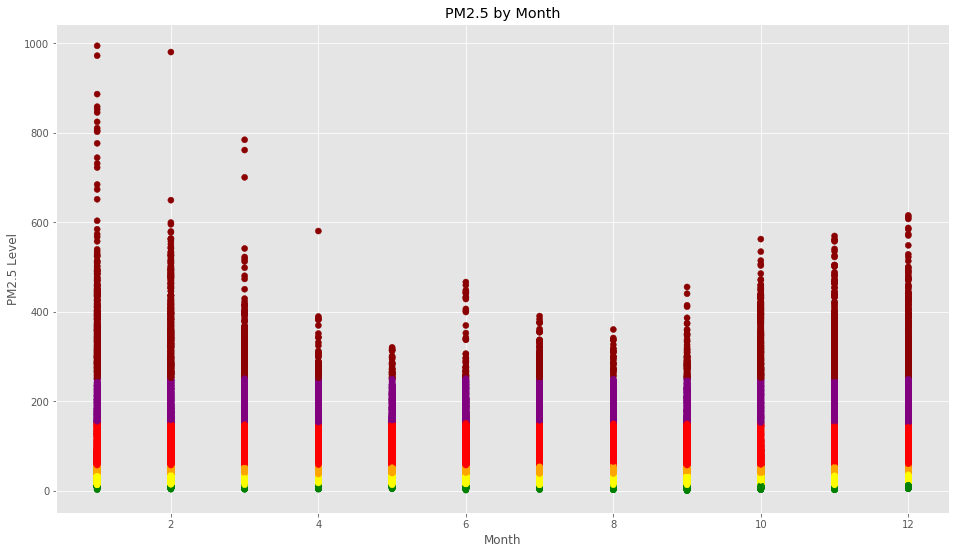

In [79]:
# plot features
x = df['month']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

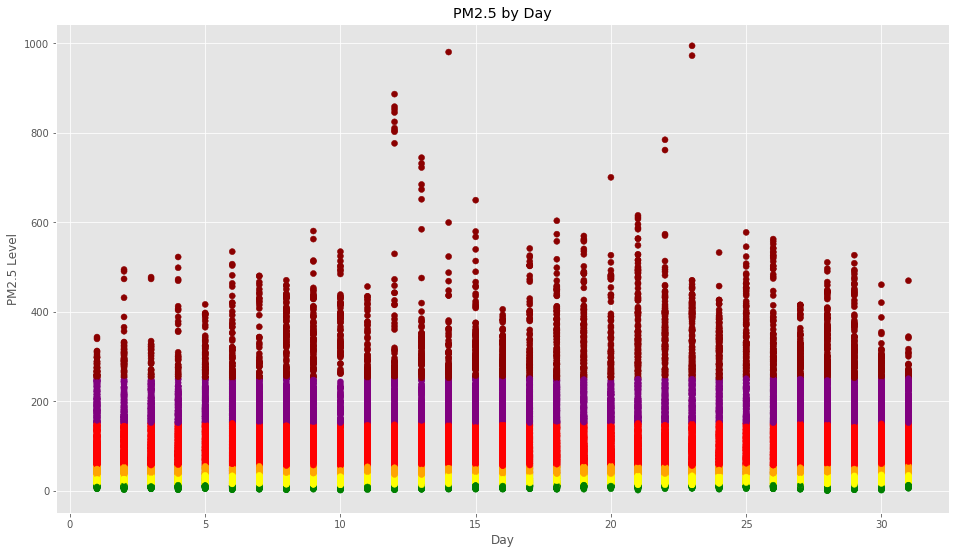

In [80]:
x = df['day']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Day')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Day')
plt.show()

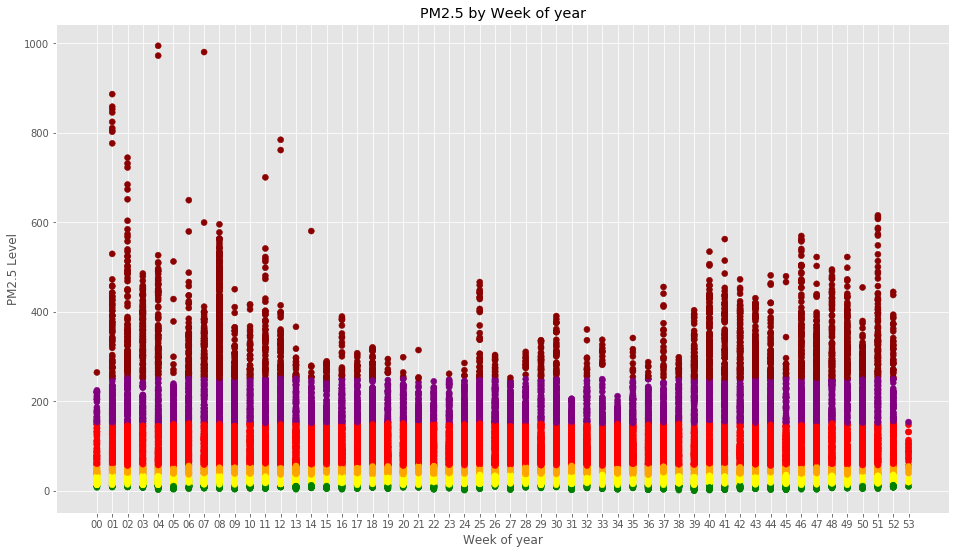

In [81]:
x = df['week of year']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Week of year')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Week of year')
plt.show()

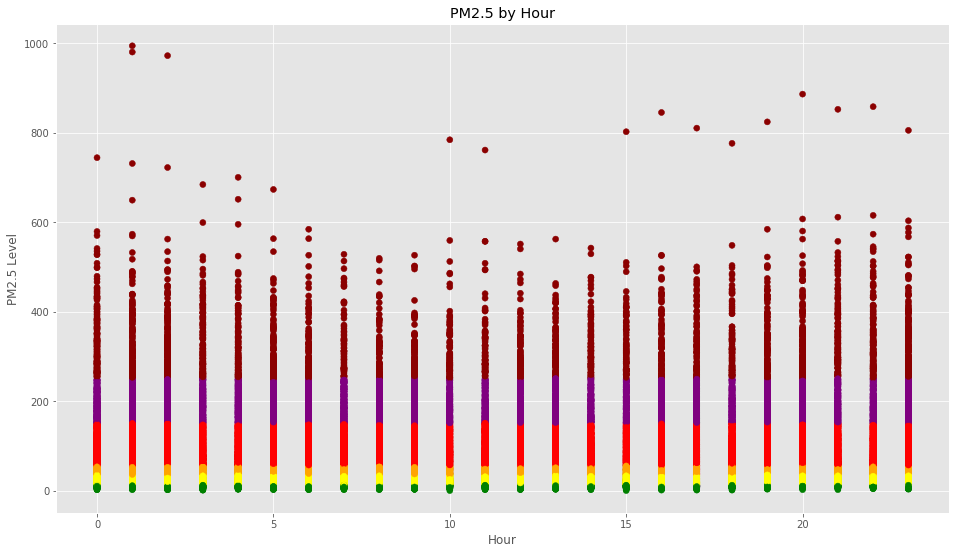

In [82]:
x = df['hour']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()
# afternoon to sunrise more serious

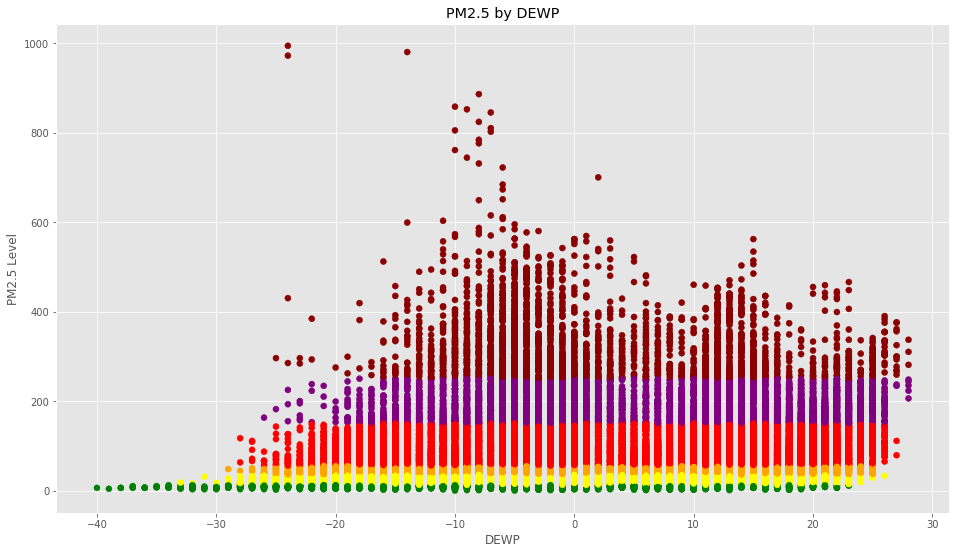

In [83]:
x = df['DEWP']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('DEWP')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by DEWP')
plt.show()

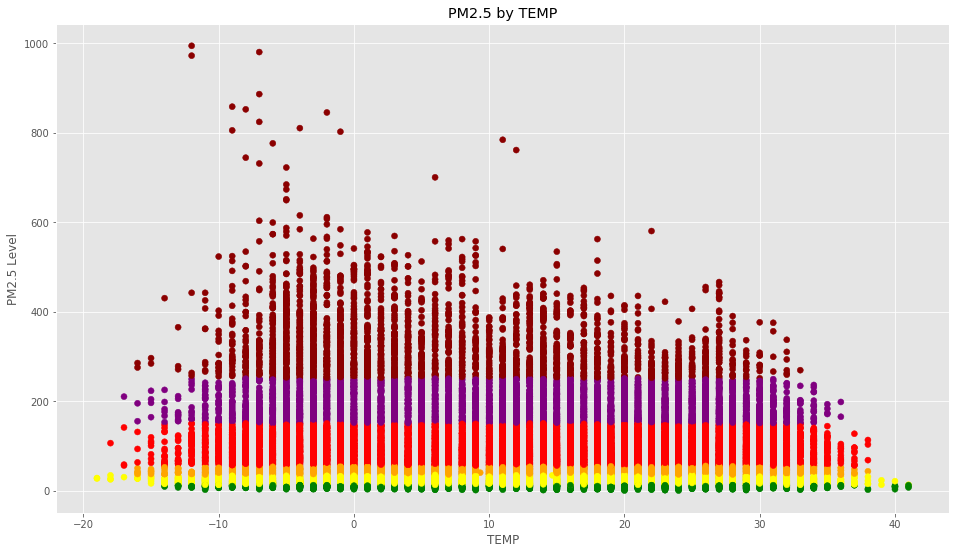

In [84]:
x = df['TEMP']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('TEMP')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by TEMP')
plt.show()

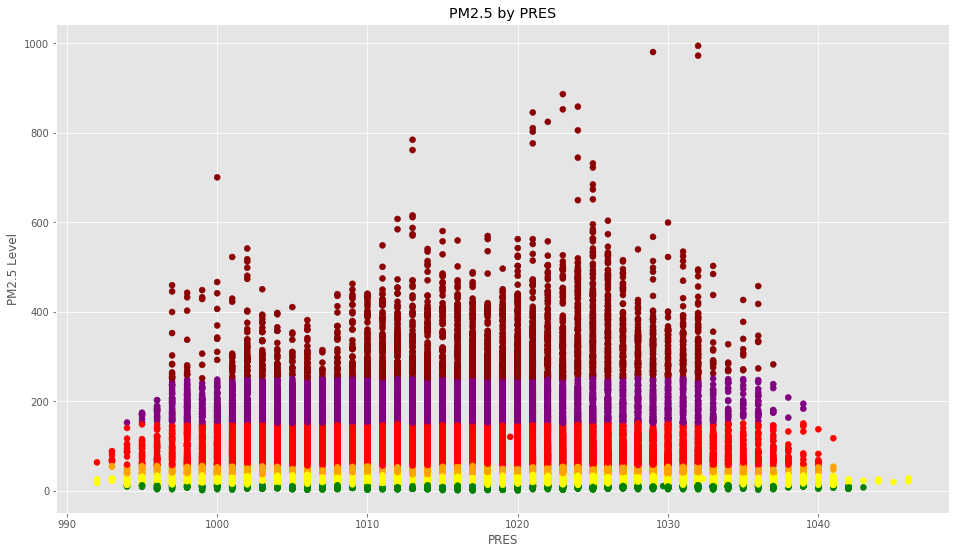

In [85]:
x = df['PRES']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('PRES')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by PRES')
plt.show()

In [86]:
len(df[df['pm2.5']>500])

106

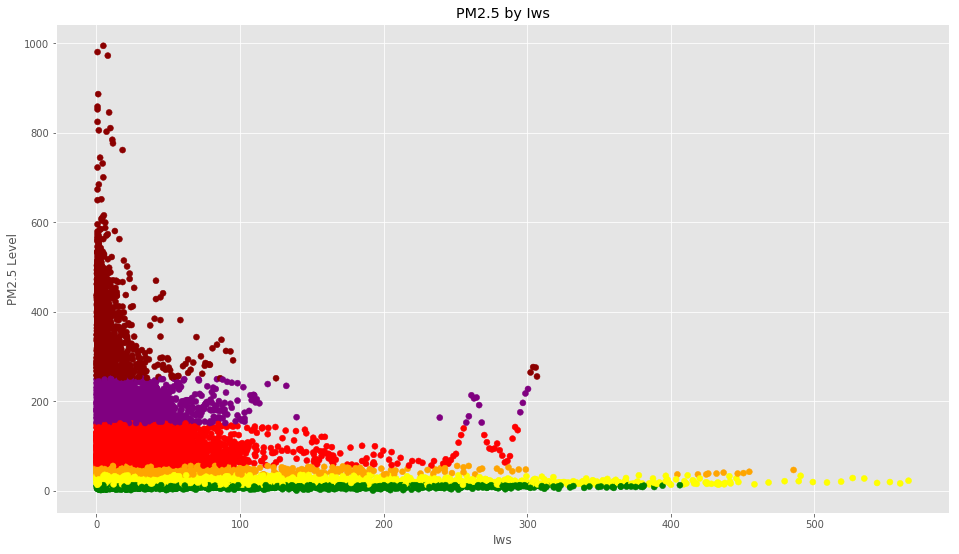

In [87]:
x = df['Iws']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Iws')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Iws')
plt.show()

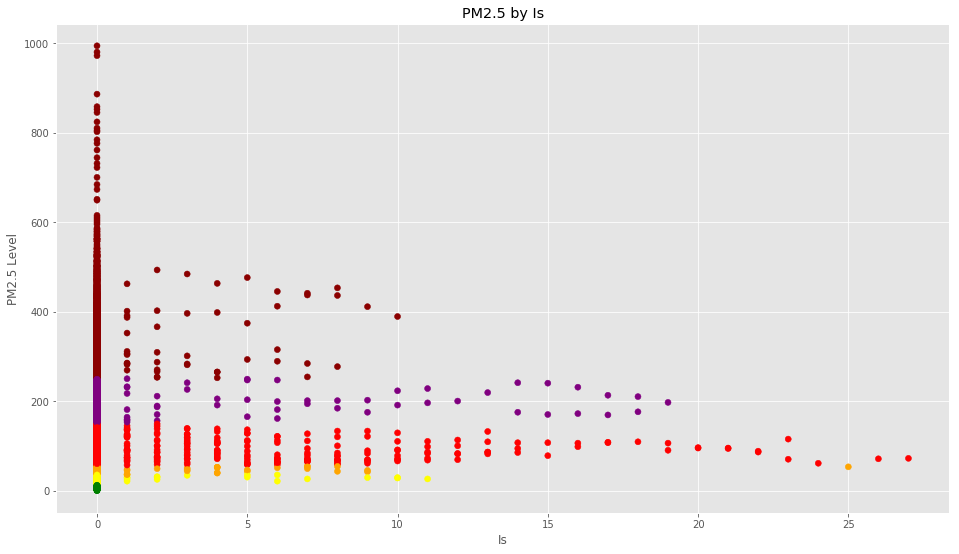

In [88]:
x = df['Is']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Is')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Is')
plt.show()

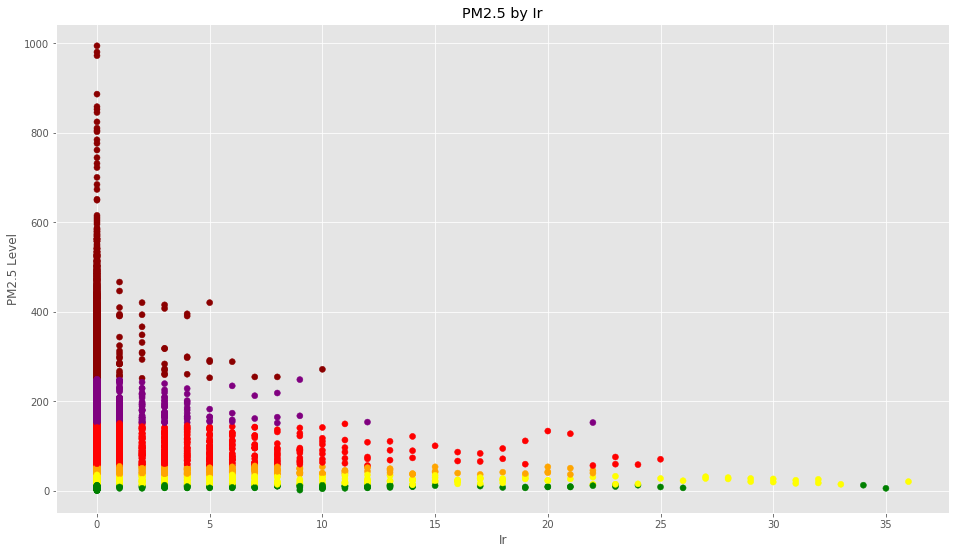

In [89]:
x = df['Ir']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Ir')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Ir')
plt.show()

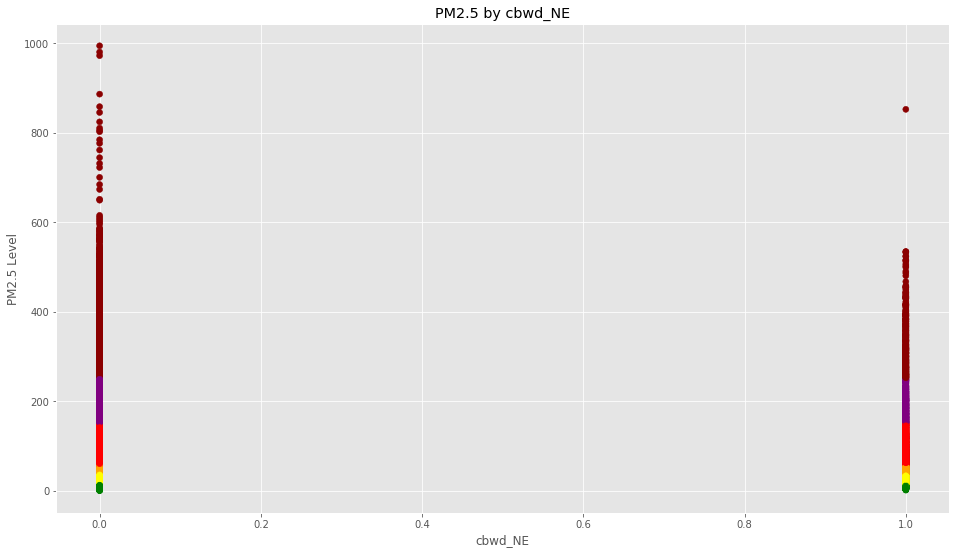

In [90]:
x = df['cbwd_NE']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('cbwd_NE')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by cbwd_NE')
plt.show()

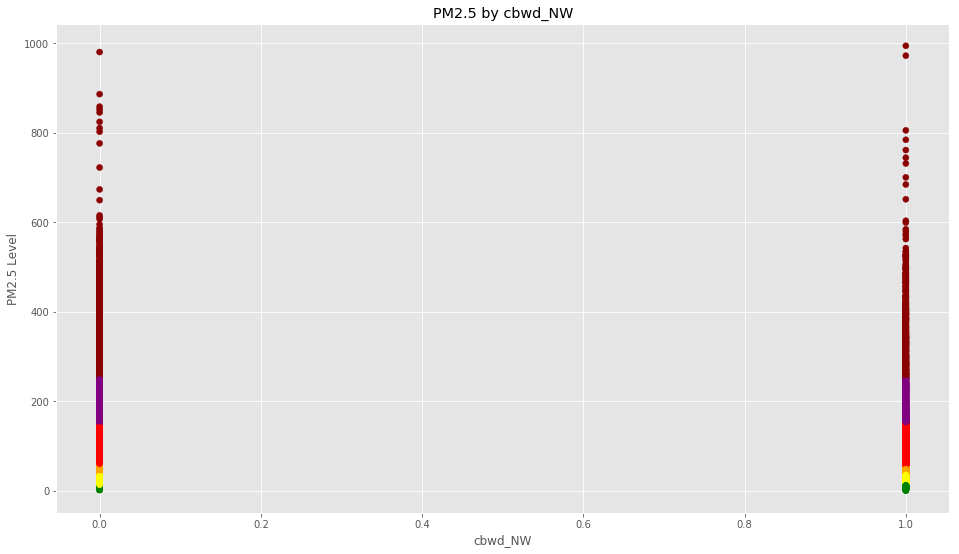

In [91]:
x = df['cbwd_NW']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('cbwd_NW')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by cbwd_NW')
plt.show()

In [ ]:
x = df['cbwd_SE']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('cbwd_SE')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by cbwd_SE')
plt.show()

In [ ]:
x = df['cbwd_cv']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('cbwd_cv')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by cbwd_cv')
plt.show()

# 風向 is not a significant factor？

In [ ]:
# 3D plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# plot 3d diagram
x = df['month']
y = df['day']
z = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []

for item in z:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

ax.scatter(x, y, z, c=number, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('Month')
ax.set_ylabel('Day')
ax.set_zlabel('PM 2.5')
plt.title('PM2.5 by month & day')
plt.show()

In [ ]:
# 3D plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# plot 3d diagram
x = df['hour']
y = df['week of year']
z = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []

for item in z:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

ax.scatter(x, y, z, c=number, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('Hour')
ax.set_ylabel('Week of year')
ax.set_zlabel('PM 2.5')
plt.title('PM2.5 by hour & week of year')
plt.show()

In [ ]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=df['month'],  # <-- Put your data instead
    y=df['hour'],  # <-- Put your data instead
    z=df['pm2.5'],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 1,
        'opacity': 1,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

In [ ]:
# 3D plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# plot 3d diagram
x = df['hour']
y = df['day']
z = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []

for item in z:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

ax.scatter(x, y, z, c=number, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('Hour')
ax.set_ylabel('Day')
ax.set_zlabel('PM 2.5')
plt.title('PM2.5 by hour & day')
plt.show()

In [ ]:
# 3D plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# plot 3d diagram
x = df['DEWP']
y = df['TEMP']
z = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []

for item in z:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

ax.scatter(x, y, z, c=number, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('DEWP')
ax.set_ylabel('TEMP')
ax.set_zlabel('PM 2.5')
plt.title('PM2.5 by DEWP & TEMP')
plt.show()

In [ ]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=df['DEWP'],  # <-- Put your data instead
    y=df['TEMP'],  # <-- Put your data instead
    z=df['pm2.5'],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 1,
        'opacity': 1,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

In [ ]:
# 3D plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# plot 3d diagram
x = df['DEWP']
y = df['PRES']
z = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []

for item in z:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

ax.scatter(x, y, z, c=number, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('DEWP')
ax.set_ylabel('PRES')
ax.set_zlabel('PM 2.5')
plt.title('PM2.5 by DEWP & PRES')
plt.show()

In [ ]:
# 3D plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# plot 3d diagram
x = df['PRES']
y = df['TEMP']
z = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []

for item in z:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

ax.scatter(x, y, z, c=number, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('PRES')
ax.set_ylabel('TEMP')
ax.set_zlabel('PM 2.5')
plt.title('PM2.5 by PRES & TEMP')
plt.show()

In [ ]:
# 3D plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# plot 3d diagram
x = df['Iws']
y = df['Is']
z = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []

for item in z:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

ax.scatter(x, y, z, c=number, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('Iws')
ax.set_ylabel('Is')
ax.set_zlabel('PM 2.5')
plt.title('PM2.5 by Iws & Is')
plt.show()

<a id='4. Split into train & test set'></a>
## 4. Split into train & test set

In [ ]:
y = df['pm2.5']
X = df.drop(['pm2.5','date'], axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
X.columns

<a id='5. Implement algorithms'></a>
## 5. Implement algorithms

<a id='5.1. Linear Regression'></a>
## 5.1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(X_train, y_train)

In [ ]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [ ]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

In [ ]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

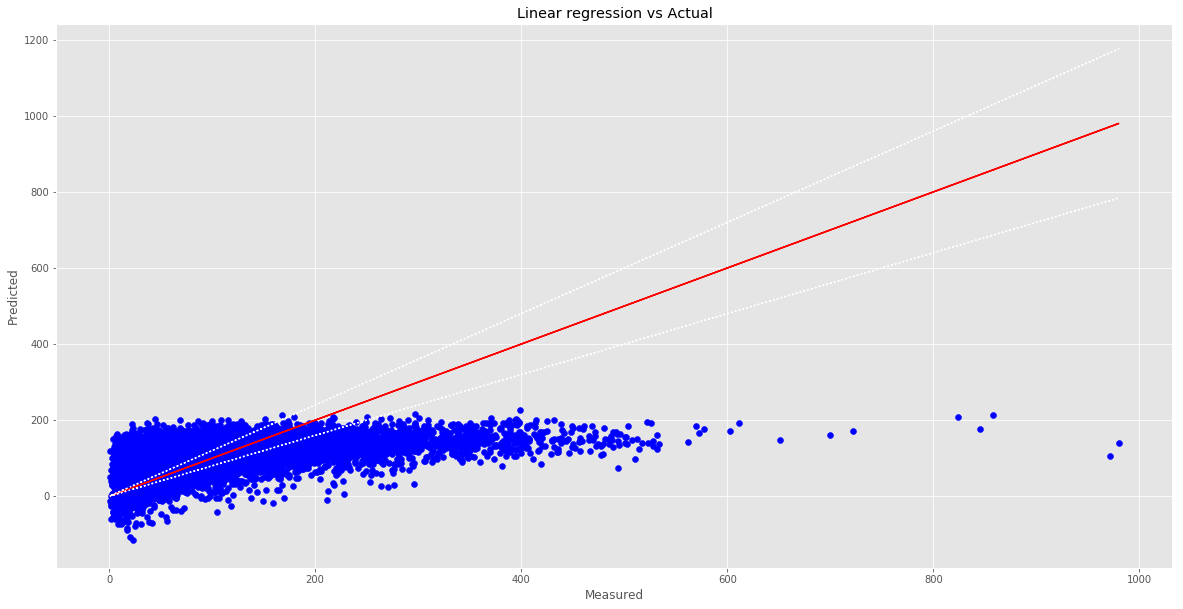

In [236]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear regression vs Actual')
x = y_test
y = x
plt.plot(x, y, '-r', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
ax.scatter(y_test, lin_pred , c='blue')
plt.show()

<a id='5.2. Neural Network Regression'></a>
## 5.2. Neural Network Regression

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [ ]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

In [ ]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

In [ ]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [ ]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

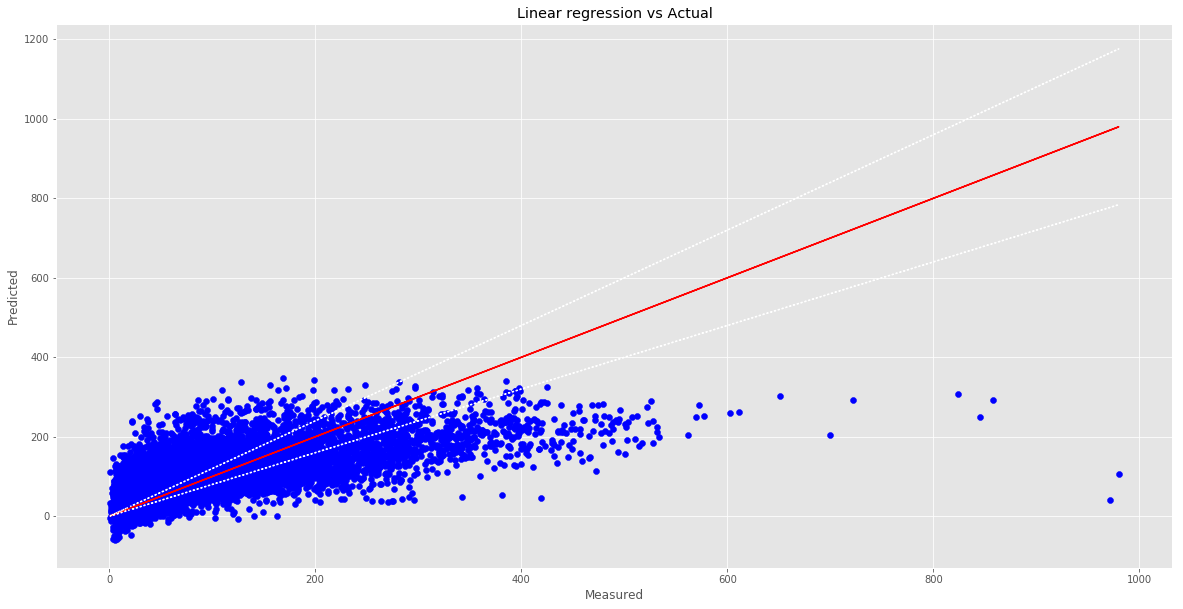

In [237]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear regression vs Actual')
x = y_test
y = x
plt.plot(x, y, '-r', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
ax.scatter(y_test, nnr_pred , c='blue')
plt.show()

<a id='5.3. Lasso'></a>
## 5.3. Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [ ]:
lasso.fit(X_train, y_train)

In [ ]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

In [ ]:
lasso.predict(X_test)

In [ ]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

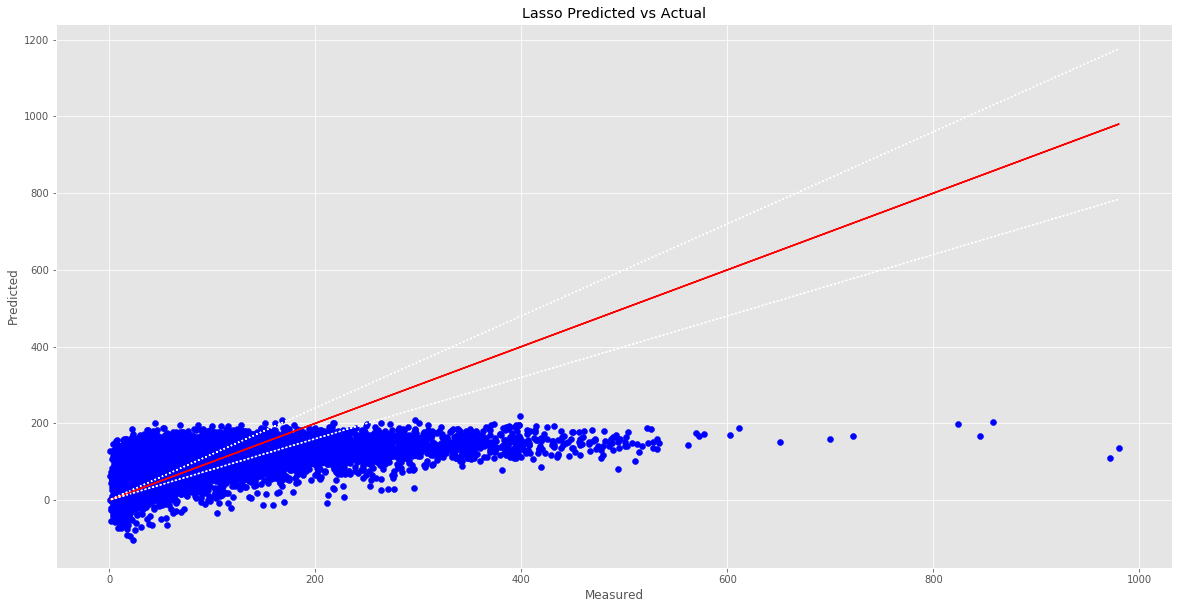

In [238]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-r', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
ax.scatter(y_test, lasso_pred, c='blue')
plt.show()

<a id='5.4. ElasticNet'></a>
## 5.4. ElasticNet

In [21]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

In [22]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.26196613712157135

In [24]:
elasticnet_pred = elasticnet.predict(X_test)

In [25]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))

Root mean squared error: 79.49


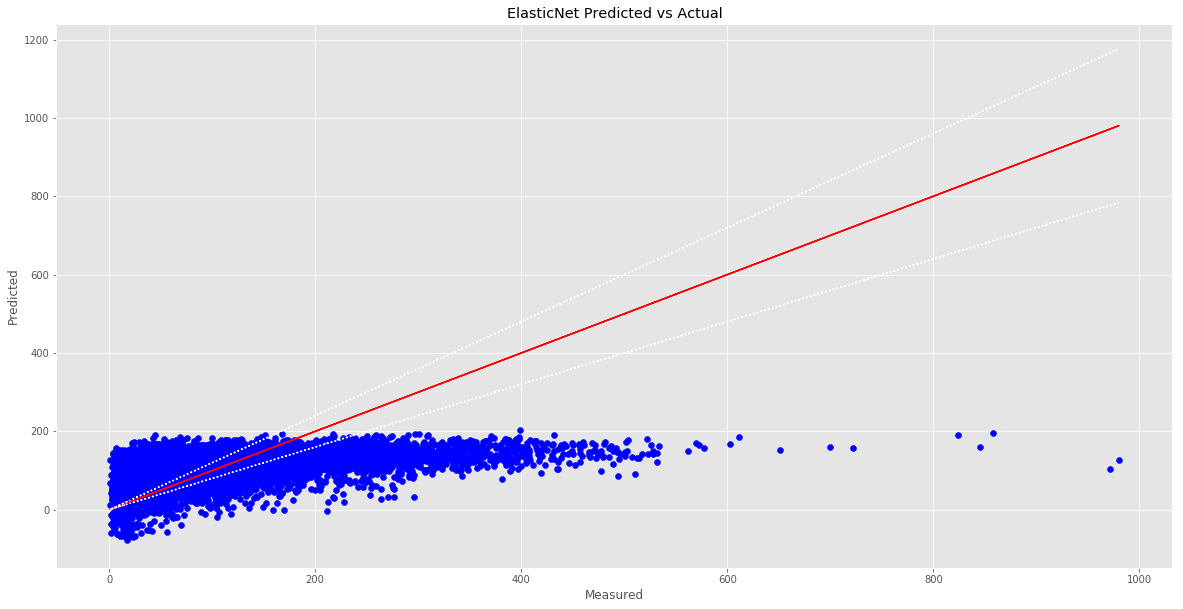

In [239]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('ElasticNet Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-r', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
ax.scatter(y_test, elasticnet_pred, c='blue')
plt.show()

<a id='5.5. Decision Forest Regression'></a>
## 5.5. Decision Forest Regression

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1)

In [141]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [142]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.8064277431983048

In [143]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [144]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 40.71
Mean absolute error: 25.16
R-squared: 0.81


In [145]:
X.columns

Index(['month', 'day', 'week of year', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws',
       'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv'],
      dtype='object')

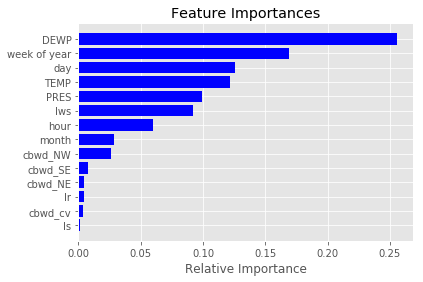

In [146]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

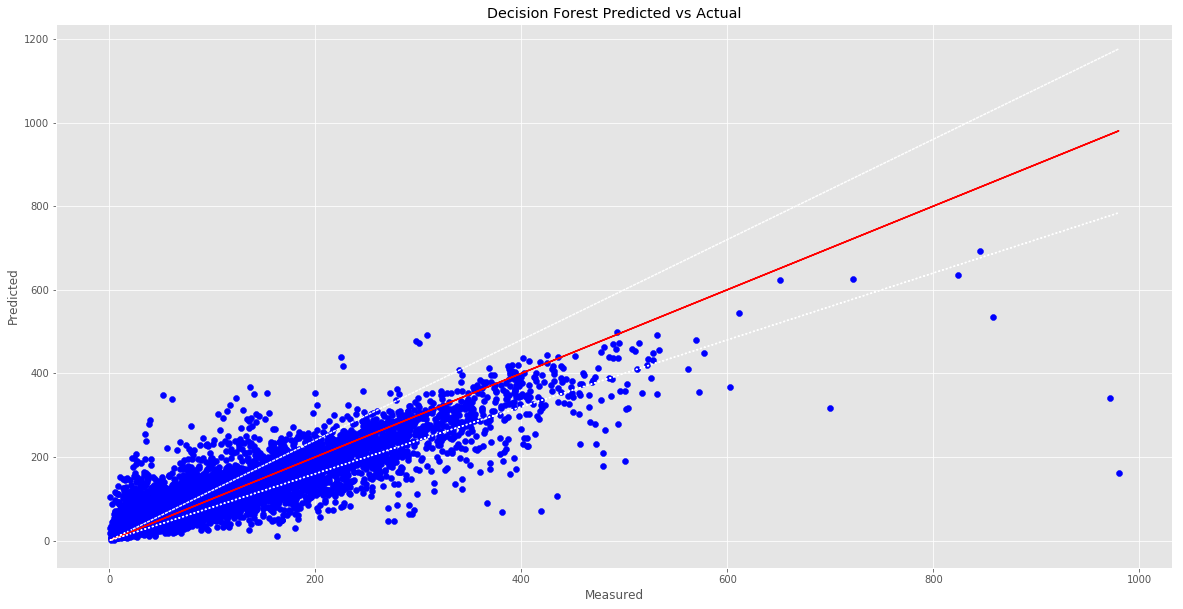

In [240]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-r', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
ax.scatter(y_test, regr_rf_pred, c='blue')
plt.show()

<a id='5.6. Extra Trees Regression'></a>
## 5.6. Extra Trees Regression

In [159]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1)

In [160]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1, verbose=0, warm_start=False)

In [161]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.8133931040218403

In [162]:
extratree_pred = extra_tree.predict(X_test)

In [163]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Root mean squared error: 39.97


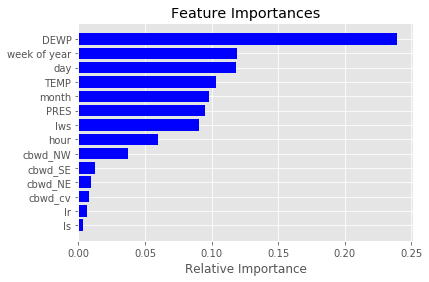

In [164]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

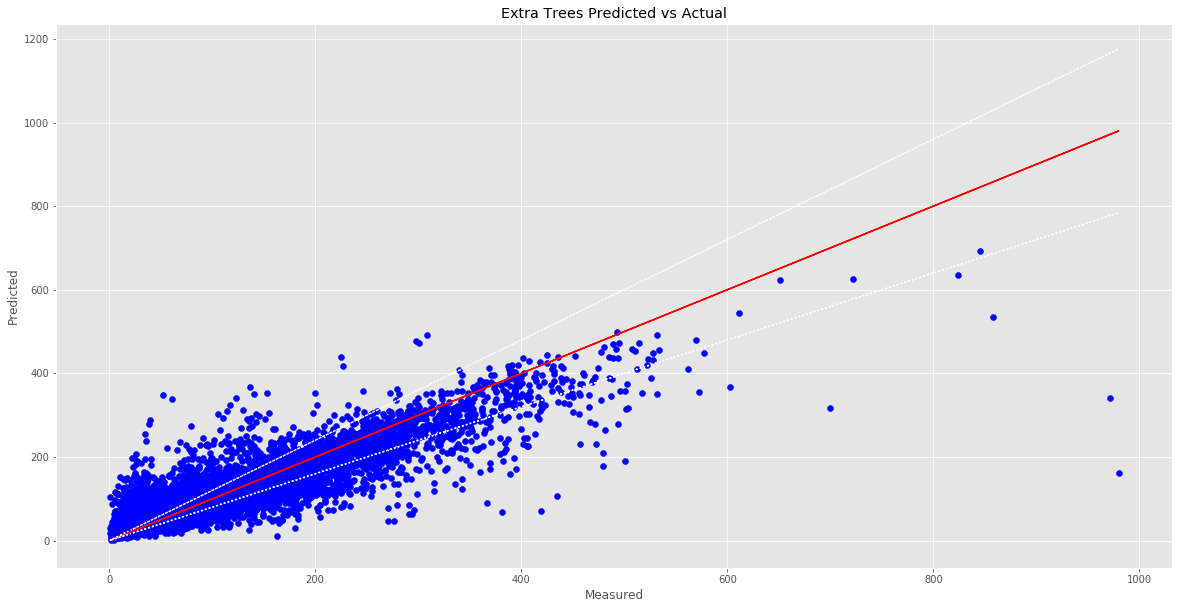

In [241]:


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-r', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
ax.scatter(y_test, regr_rf_pred, c='blue')
plt.show()

<a id='5.7. Decision Tree + AdaBoost'></a>
## 5.7. Decision Tree + AdaBoost

In [167]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [168]:
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=None)

In [169]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.6131970357298193

In [170]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.8426993203330146

In [171]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [172]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Coefficients: 
 [ 29.0362269    1.73810623  -6.86421418   1.26103242   4.29749053
  -6.57021476  -1.70072695  -0.2156304   -2.26503599  -6.554341
 -12.72203708 -13.40684868  12.79589336  13.3329924 ]
Root mean squared error: 36.70
Mean absolute error: 19.55
R-squared: 0.84


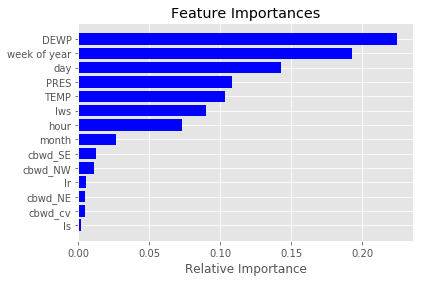

In [173]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

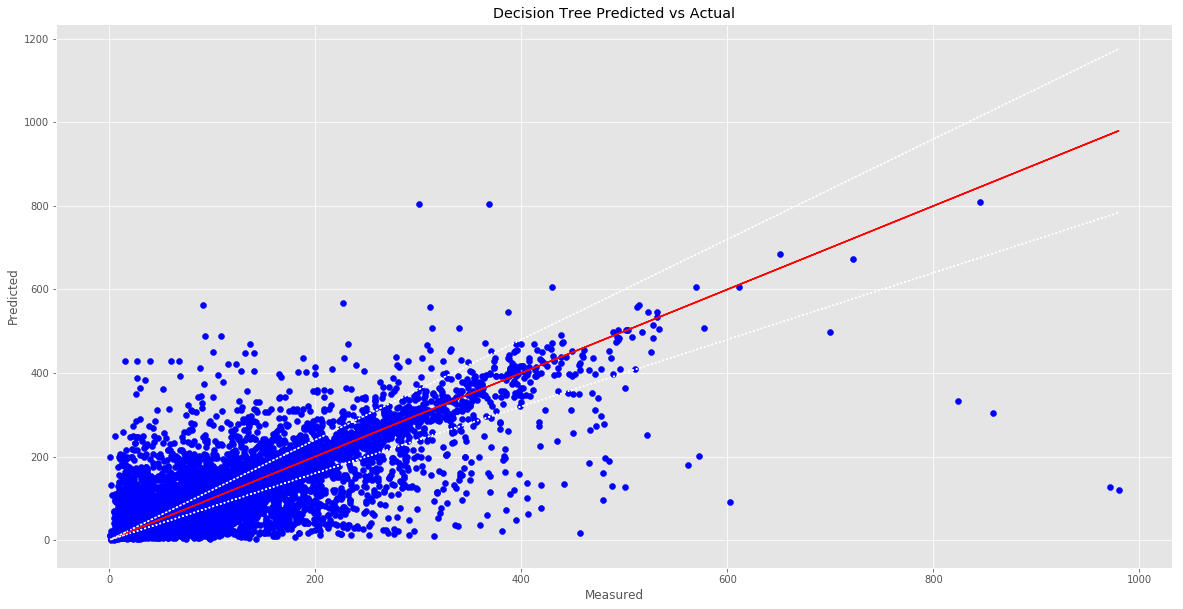

In [242]:

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-r', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
ax.scatter(y_test,tree_1_pred , c='blue')
plt.show()

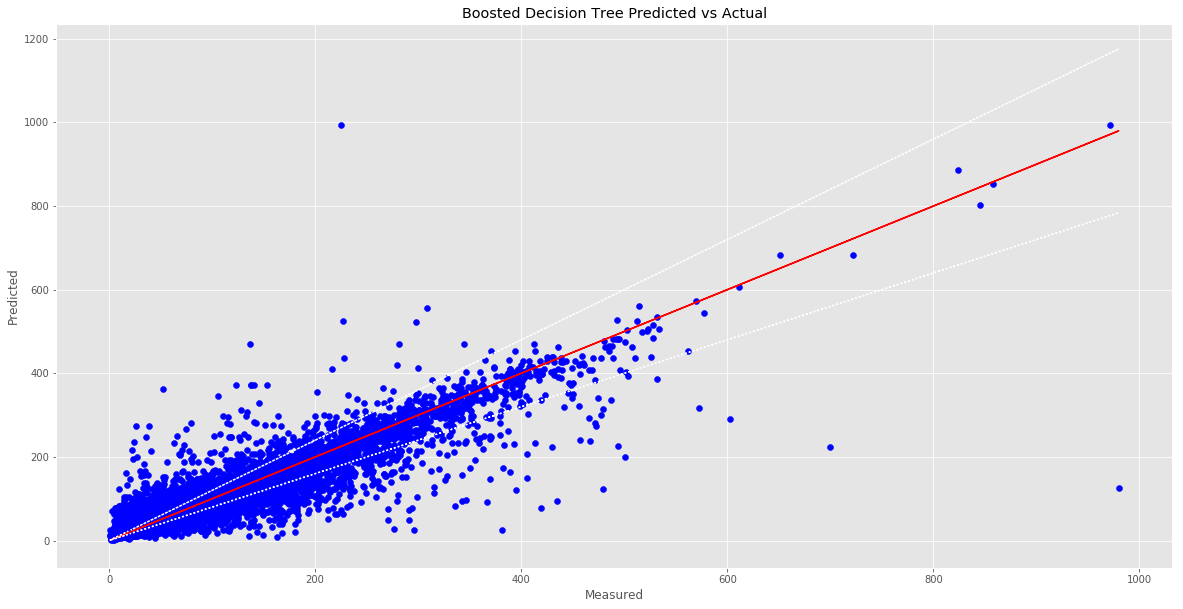

In [243]:


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-r', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
ax.scatter(y_test,tree_2_pred , c='blue')
plt.show()
plt.show()

In [198]:
# Prep for 5.8
# change week of year to float
df['week of year'] = df['week of year'].apply(pd.to_numeric, downcast='float', errors='coerce')
print(df.dtypes)

date            datetime64[ns]
month                    int64
day                      int64
week of year           float64
hour                     int64
DEWP                     int64
TEMP                   float64
PRES                   float64
Iws                    float64
Is                       int64
Ir                       int64
cbwd_NE                  int64
cbwd_NW                  int64
cbwd_SE                  int64
cbwd_cv                  int64
pm2.5                  float64
dtype: object


Exception ignored in: <function DMatrix.__del__ at 0x7f9cd16f3598>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <function DMatrix.__del__ at 0x7f9cd16f3598>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [199]:
df

,date,month,day,week of year,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,2010-01-02,1,2,0.0,0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0,129.0
1,2010-01-02,1,2,0.0,1,-15,-4.0,1020.0,2.68,0,0,0,0,1,0,148.0
2,2010-01-02,1,2,0.0,2,-11,-5.0,1021.0,3.57,0,0,0,0,1,0,159.0
3,2010-01-02,1,2,0.0,3,-7,-5.0,1022.0,5.36,1,0,0,0,1,0,181.0
4,2010-01-02,1,2,0.0,4,-7,-5.0,1022.0,6.25,2,0,0,0,1,0,138.0
5,2010-01-02,1,2,0.0,5,-7,-6.0,1022.0,7.14,3,0,0,0,1,0,109.0
6,2010-01-02,1,2,0.0,6,-7,-6.0,1023.0,8.93,4,0,0,0,1,0,105.0
7,2010-01-02,1,2,0.0,7,-7,-5.0,1024.0,10.72,0,0,0,0,1,0,124.0
8,2010-01-02,1,2,0.0,8,-8,-6.0,1024.0,12.51,0,0,0,0,1,0,120.0
9,2010-01-02,1,2,0.0,9,-7,-5.0,1025.0,14.30,0,0,0,0,1,0,132.0


In [200]:
y = df['pm2.5']
X = df.drop(['pm2.5','date'], axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [201]:
X_train.shape, y_train.shape

((25022, 14), (25022,))

In [202]:
X_test.shape, y_test.shape

((10724, 14), (10724,))

In [203]:
X.columns

Index(['month', 'day', 'week of year', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws',
       'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv'],
      dtype='object')

<a id='5.8. XGBoost'></a>
## 5.8. XGBoost

In [204]:
from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

In [205]:
xboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [206]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.5795063198085413

In [207]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [208]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 60.00


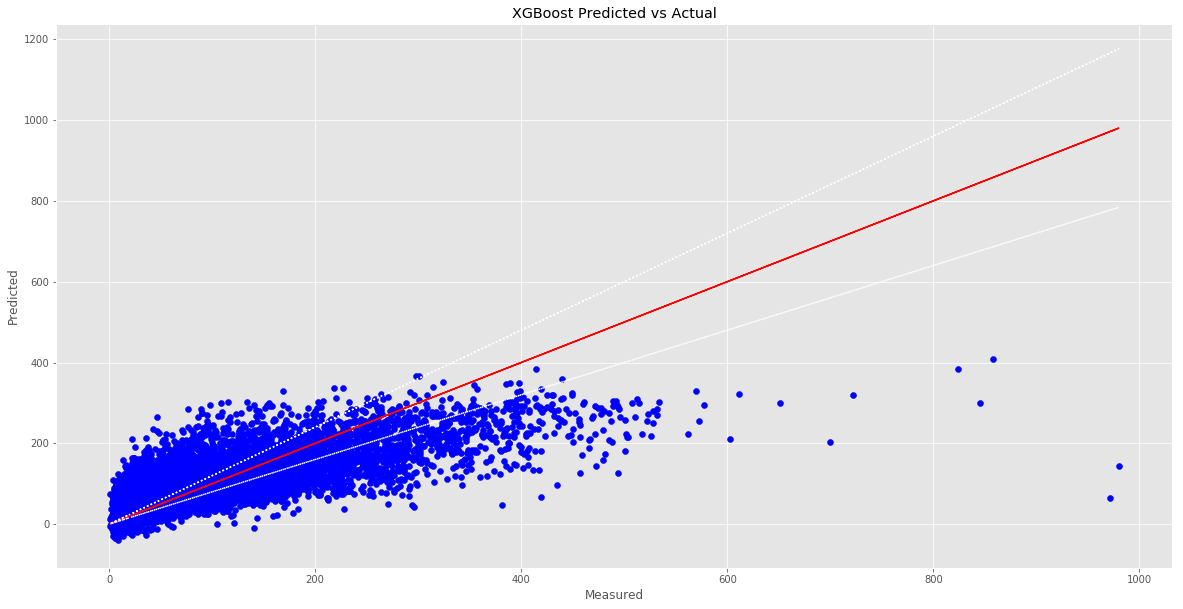

In [244]:

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-r', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
ax.scatter(y_test,xboost_pred , c='blue')
plt.show()
plt.show()
plt.show()

<a id='6. Evaluation'></a>
# 6. Evaluation

In [83]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  0.27312248578005094
Neural network regression score:  0.4180344392658959
Lasso regression score:  0.2690061889089842
ElasticNet regression score:  0.26196613712157135
Decision forest score:  0.8064277431983048
Extra Trees score:  0.8133931040218403
Boosted decision tree score:  0.8411208715391117
XGBoost score: 0.5795063198085413


RMSE:
Linear regression RMSE: 78.89
Neural network RMSE: 70.59
Lasso RMSE: 79.11
ElasticNet RMSE: 79.49
Decision forest RMSE: 40.71
Extra Trees RMSE: 39.97
Boosted decision tree RMSE: 36.88
XGBoost RMSE: 60.00
